In [1]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pltsSS
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report
print("presented by: Mahtava Saxena, Kshitiz, Ajay, Arnav, Gokul")


presented by: Mahtava Saxena, Kshitiz, Ajay, Arnav, Gokul


In [2]:
train_dir = r'C:\Users\Asus\train'

In [3]:
name_class = os.listdir(train_dir)
name_class

['benin', 'malignant']

In [4]:
train_dirs = list(glob.glob(train_dir+'/**/*.*'))

In [5]:
train_dirs

['C:\\Users\\Asus\\train\\benin\\b1 (1).jpeg',
 'C:\\Users\\Asus\\train\\benin\\b12 (1).jpeg',
 'C:\\Users\\Asus\\train\\benin\\b12.jpeg',
 'C:\\Users\\Asus\\train\\benin\\b13.jpeg',
 'C:\\Users\\Asus\\train\\benin\\b14.jpeg',
 'C:\\Users\\Asus\\train\\benin\\b15.jpeg',
 'C:\\Users\\Asus\\train\\benin\\b5 (1).jpeg',
 'C:\\Users\\Asus\\train\\benin\\b6 (1).jpeg',
 'C:\\Users\\Asus\\train\\benin\\b7 (1).jpg',
 'C:\\Users\\Asus\\train\\malignant\\m1 (2).jpeg',
 'C:\\Users\\Asus\\train\\malignant\\m2 (1).jpeg',
 'C:\\Users\\Asus\\train\\malignant\\m3 (1).jpeg',
 'C:\\Users\\Asus\\train\\malignant\\m5 (1).jpeg',
 'C:\\Users\\Asus\\train\\malignant\\m6 (1).jpeg',
 'C:\\Users\\Asus\\train\\malignant\\m6.jpeg',
 'C:\\Users\\Asus\\train\\malignant\\m6.jpg',
 'C:\\Users\\Asus\\train\\malignant\\m7 (1).jpg',
 'C:\\Users\\Asus\\train\\malignant\\m7.jpg',
 'C:\\Users\\Asus\\train\\malignant\\m8.jpg']

In [6]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], train_dirs))
labels

['benin',
 'benin',
 'benin',
 'benin',
 'benin',
 'benin',
 'benin',
 'benin',
 'benin',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant']

In [7]:
train_dir = pd.Series(train_dirs, name='train_dir').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([train_dir, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)

,train_dir,Label
0,C:\Users\Asus\train\benin\b15.jpeg,benin
1,C:\Users\Asus\train\malignant\m7.jpg,malignant
2,C:\Users\Asus\train\malignant\m3 (1).jpeg,malignant
3,C:\Users\Asus\train\benin\b1 (1).jpeg,benin
4,C:\Users\Asus\train\benin\b6 (1).jpeg,benin


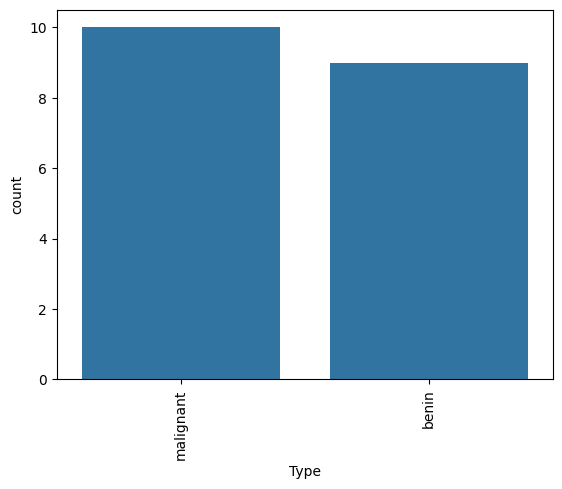

In [8]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [9]:
train,test = train_test_split(data, test_size = 0.25, random_state=42)

<function matplotlib.pyplot.show(close=None, block=None)>

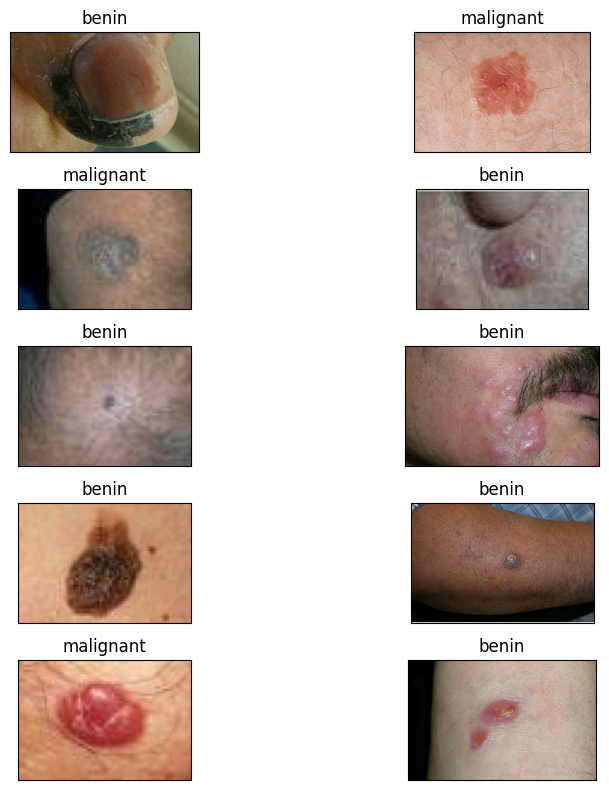

In [10]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.train_dir[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show

In [11]:
from keras.applications.resnet50 import preprocess_input
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [12]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='train_dir',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='train_dir',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='train_dir',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
)

Found 14 validated image filenames belonging to 2 classes.
Found 5 validated image filenames belonging to 2 classes.
Found 5 validated image filenames belonging to 2 classes.


In [13]:
from keras.applications.resnet50 import ResNet50

pretrained_model = ResNet50(
    input_shape=(100,100,3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False


In [14]:
from keras.layers import Dense

inputs = pretrained_model.input

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)

outputs = Dense(2, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [15]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [16]:
from keras.callbacks import EarlyStopping
my_callbacks = [EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=2,
                              mode='auto')]

In [17]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=100
)

Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 1.2204 - accuracy: 0.5000 - val_loss: 0.4469 - val_accuracy: 0.8000
Epoch 2/100
1/1 [==============================] - 0s 481ms/step - loss: 0.4071 - accuracy: 0.7857 - val_loss: 0.5652 - val_accuracy: 0.6000
Epoch 3/100
1/1 [==============================] - 0s 475ms/step - loss: 0.1372 - accuracy: 0.9286 - val_loss: 1.0513 - val_accuracy: 0.6000
Epoch 4/100
1/1 [==============================] - 0s 476ms/step - loss: 0.0507 - accuracy: 1.0000 - val_loss: 1.4343 - val_accuracy: 0.6000
Epoch 5/100
1/1 [==============================] - 0s 480ms/step - loss: 0.0302 - accuracy: 1.0000 - val_loss: 1.6306 - val_accuracy: 0.6000
Epoch 6/100
1/1 [==============================] - 0s 480ms/step - loss: 0.0186 - accuracy: 1.0000 - val_loss: 1.6915 - val_accuracy: 0.6000
Epoch 7/100
1/1 [==============================] - 0s 494ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 1.6825 - val_accuracy: 0.6000
Epoch 8/100
1/1 

In [18]:
model.save("model_resnet50.h5")

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


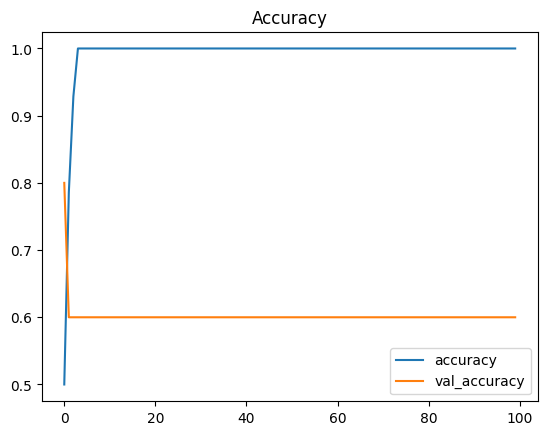

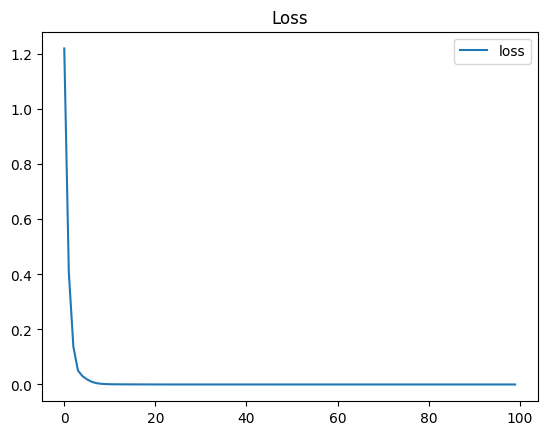

In [19]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss']].plot()
plt.title("Loss")
plt.show()                            

In [20]:
results = model.evaluate(test_gen, verbose=0)

print("      Test Loss:   {:.5f}".format(results[0]))
print("Test Accuracy:   {:.5f}%".format(results[1] * 100))

      Test Loss:   2.20198
Test Accuracy:   60.00000%


In [21]:
#Predict the label of the test_gen
pred =  model.predict(test_gen)
pred = np.argmax(pred,axis=1)

#Map the label
labels = (train_gen.class_indices)
labels = dict((v,k)  for k,v in labels.items())
pred = [labels[k] for k in pred]

1/1 [==============================] - 1s 957ms/step


In [22]:
y_test = list(test.Label)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       benin       0.50      1.00      0.67         2
   malignant       1.00      0.33      0.50         3

    accuracy                           0.60         5
   macro avg       0.75      0.67      0.58         5
weighted avg       0.80      0.60      0.57         5



<function matplotlib.pyplot.show(close=None, block=None)>

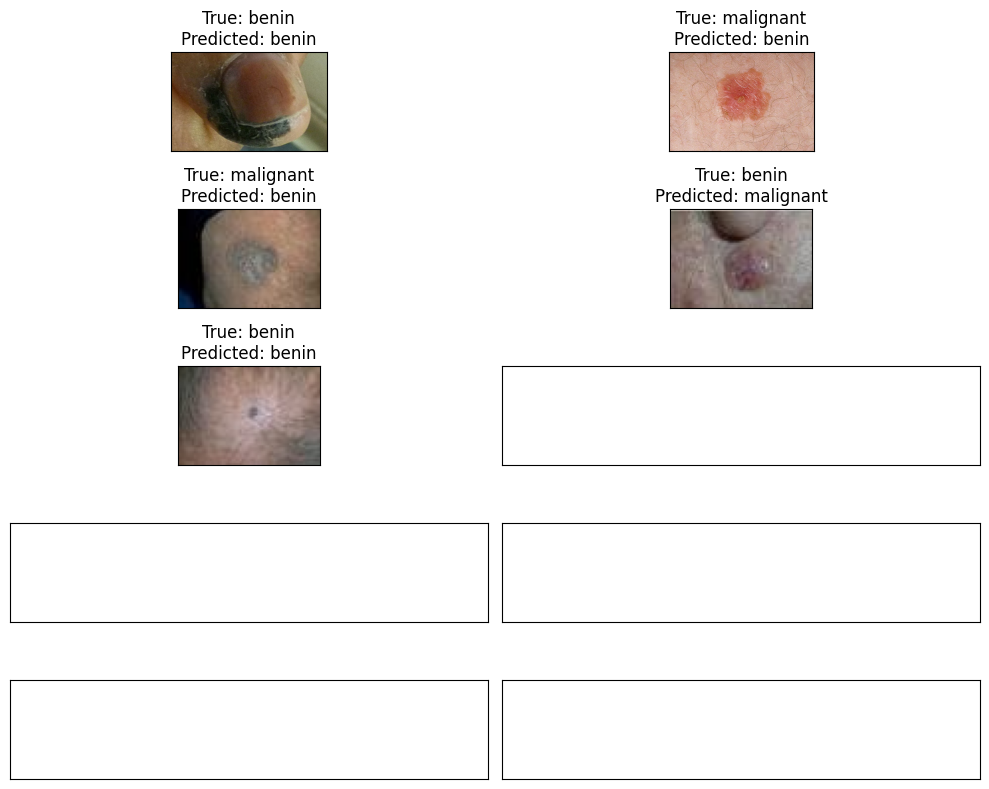

In [23]:
fig, axes = plt.subplots(nrows=5,ncols=2, figsize=(10,8),
                         subplot_kw= {'xticks' : [], 'yticks': []})
min_len = min(len(axes.flat), len(data.train_dir), len(pred))

for i in range(min_len):
    ax = axes.flat[i]
    ax.imshow(plt.imread(data.train_dir.iloc[i]))
    ax.set_title(f"True: {data.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show
